In [10]:
# For Data Processing
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from keras.models import load_model  
from keras.layers import Dropout

In [2]:
df = pd.read_csv('/Users/jun/Library/CloudStorage/OneDrive-개인/clinical db stomach/ML/early_complication_detection.csv',encoding = 'ISO-8859-1')
df = df[['Sex','Age_grp','ASA_Score_nm','Smoking','Drinking','BMI_calc_grp2','Ass_condition_HT','Ass_condition_DM','n_Ass_condition_grp2','Ass_lesion','Clinical_Stage_nm','fStage_grp_nm','Operation_nm','Location_nm','Histology_nm','Lauren_nm','Reconstruction_nm','LN_Dissection_nm','Combined_Resection_nm','Intraop_cc','Hemoglobin_status','Neutrophil_count_status','Z_EBL','OP_time','Platelets','Albumin','Cell_Count','Early_CC_YN']]

In [3]:
#df['Sex'] = df['Sex'].replace('M',1)
#df['Sex'] = df['Sex'].replace('F',0)

df['Age_grp']=df['Age_grp'].replace('1 <50',"mid")
df['Age_grp']=df['Age_grp'].replace('2 50-69',"old")
df['Age_grp']=df['Age_grp'].replace('3 70+','oldold')

#df['ASA_Score_nm']=df['ASA_Score_nm'].replace('1-2',1)
#df['ASA_Score_nm']=df['ASA_Score_nm'].replace('3-4',2)

#df['Smoking']=df['Smoking'].replace('Yes',1)
#df['Smoking']=df['Smoking'].replace('No',0)

#df['Drinking']=df['Drinking'].replace('Yes',1)
#df['Drinking']=df['Drinking'].replace('No',0)

df['BMI_calc_grp2']=df['BMI_calc_grp2'].replace('1 <18.5','under')
df['BMI_calc_grp2']=df['BMI_calc_grp2'].replace('2 18.5-24.9','normal_preobe')
df['BMI_calc_grp2']=df['BMI_calc_grp2'].replace('3 >25','obe')


df["Ass_condition_HT"] = df["Ass_condition_HT"].replace(1,'Yes')
df["Ass_condition_HT"] = df["Ass_condition_HT"].replace(0,'No')

df["Ass_condition_DM"] = df["Ass_condition_DM"].replace(1,'Yes')
df["Ass_condition_DM"] = df["Ass_condition_DM"].replace(0,'No')


df['n_Ass_condition_grp2']=df['n_Ass_condition_grp2'].replace('0','zero')
df['n_Ass_condition_grp2']=df['n_Ass_condition_grp2'].replace('1','one')
df['n_Ass_condition_grp2']=df['n_Ass_condition_grp2'].replace('2','two')
df['n_Ass_condition_grp2']=df['n_Ass_condition_grp2'].replace('3+','above_three')

df["Ass_lesion"] = df["Ass_lesion"].replace(1,'Yes')
df["Ass_lesion"] = df["Ass_lesion"].replace(0,'No')


#df['Clinical_Stage_nm']=df['Clinical_Stage_nm'].replace('1-2',1)
#df['Clinical_Stage_nm']=df['Clinical_Stage_nm'].replace('3-4',2)

#df['fStage_grp_nm']=df['fStage_grp_nm'].replace('1-2',1)
#df['fStage_grp_nm']=df['fStage_grp_nm'].replace('3-4',2)

#df['Operation_nm']=df['Operation_nm'].replace('Total Gastractomy',1)
#df['Operation_nm']=df['Operation_nm'].replace('Partial Gastractomy',2)

df['Location_nm']=df['Location_nm'].replace('1 Lower','low')
df['Location_nm']=df['Location_nm'].replace('2 Middle','mid')
df['Location_nm']=df['Location_nm'].replace('3 Upper','up')
df['Location_nm']=df['Location_nm'].replace('4 Others','other')

df['Histology_nm']=df['Histology_nm'].replace('01. Well/Moderately differentiated','well_mode')
df['Histology_nm']=df['Histology_nm'].replace('02. Poorly differentiated/Signet ring cell','poor_signet')
df['Histology_nm']=df['Histology_nm'].replace('03. Others','others')


df['Lauren_nm']=df['Lauren_nm'].replace('1. Intestinal','intersitnal')
df['Lauren_nm']=df['Lauren_nm'].replace('2. Diffuse','diffuse')
df['Lauren_nm']=df['Lauren_nm'].replace('3. Mixed','mixed')
df['Lauren_nm']=df['Lauren_nm'].replace('4. Indeterminate','indeterminate')
df['Lauren_nm']=df['Lauren_nm'].replace('5. Unknown','unknown')

df['Reconstruction_nm']=df['Reconstruction_nm'].replace('1 BI','billroth1')
df['Reconstruction_nm']=df['Reconstruction_nm'].replace('2 BII','billroth2')
df['Reconstruction_nm']=df['Reconstruction_nm'].replace('3 Roux-en-Y','roux-en-y')
df['Reconstruction_nm']=df['Reconstruction_nm'].replace('4 Others','others')

df['LN_Dissection_nm']=df['LN_Dissection_nm'].replace('1. D1','D1')
df['LN_Dissection_nm']=df['LN_Dissection_nm'].replace('2. D2','D2')


#df['Combined_Resection_nm']=df['Combined_Resection_nm'].replace('Yes',1)
#df['Combined_Resection_nm']=df['Combined_Resection_nm'].replace('No',2)


df['Intraop_cc']=df['Intraop_cc'].replace(1,'Yes')
df['Intraop_cc']=df['Intraop_cc'].replace(0,'No')

df['Hemoglobin_status']=df['Hemoglobin_status'].replace('1. Normal','normal')
df['Hemoglobin_status']=df['Hemoglobin_status'].replace('2. Abnormal','abnormal')


df['Neutrophil_count_status']=df['Neutrophil_count_status'].replace('1. Normal','normal')
df['Neutrophil_count_status']=df['Neutrophil_count_status'].replace('2. Abnormal','abnormal')

In [4]:
df = pd.get_dummies(data = df, columns = ['Sex', 'Age_grp', 'ASA_Score_nm', 'Smoking', 'Drinking',
       'BMI_calc_grp2', 'Ass_condition_HT', 'Ass_condition_DM',
       'n_Ass_condition_grp2', 'Ass_lesion', 'Clinical_Stage_nm',
       'fStage_grp_nm', 'Operation_nm', 'Location_nm', 'Histology_nm',
       'Lauren_nm', 'Reconstruction_nm', 'LN_Dissection_nm',
       'Combined_Resection_nm', 'Intraop_cc', 'Hemoglobin_status',
       'Neutrophil_count_status'], prefix = ['sex', 'age', 'asa.score', 'smoking', 'drinking',
       'bmi', 'assoc.ht', 'assoc.dm',
       'assoc.grp', 'assoc.lesion', 'c.stage',
       'f.stage', 'operation', 'location', 'hitology',
       'Lauren_nm', 'reconstruction', 'ln.dissection',
       'comb.resection', 'intraop.cc', 'hemoglobin',
       'neutrohil'])

In [5]:
X = df.drop('Early_CC_YN', axis=1).values
y = df['Early_CC_YN'].values

In [6]:
print(X.shape, y.shape)

(3547, 61) (3547,)


## Autoencoder default model

## 반복해서 확인해봐야하나....

layer_list1 = [500,450,400,350,300]
layer_list2 = [200,150,100]
layer_list3 = [80,70,60,50]
layer_list4 = [30,20,10]

for list1 in enumerate(layer_list1):
    for list2 in enumerate(layer_list2):
            for list3 in enumerate(layer_list3):
                 for list4 in enumerate(layer_list4):
                        

Epoch 1/300


2022-05-13 11:24:06.867715: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-13 11:24:07.637355: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


149/149 - 1s - loss: 1.4613 - val_loss: 0.7656 - 1s/epoch - 7ms/step
Epoch 2/300
149/149 - 1s - loss: 0.7237 - val_loss: 0.6190 - 808ms/epoch - 5ms/step
Epoch 3/300
149/149 - 1s - loss: 0.5889 - val_loss: 0.5065 - 804ms/epoch - 5ms/step
Epoch 4/300
149/149 - 1s - loss: 0.4520 - val_loss: 0.3517 - 807ms/epoch - 5ms/step
Epoch 5/300
149/149 - 1s - loss: 0.3414 - val_loss: 0.3010 - 794ms/epoch - 5ms/step
Epoch 6/300
149/149 - 1s - loss: 0.2977 - val_loss: 0.2642 - 793ms/epoch - 5ms/step
Epoch 7/300
149/149 - 1s - loss: 0.2643 - val_loss: 0.2388 - 788ms/epoch - 5ms/step
Epoch 8/300
149/149 - 1s - loss: 0.2374 - val_loss: 0.2133 - 808ms/epoch - 5ms/step
Epoch 9/300
149/149 - 1s - loss: 0.2147 - val_loss: 0.1893 - 810ms/epoch - 5ms/step
Epoch 10/300
149/149 - 1s - loss: 0.2005 - val_loss: 0.2500 - 805ms/epoch - 5ms/step
Epoch 11/300
149/149 - 1s - loss: 0.1960 - val_loss: 0.1682 - 794ms/epoch - 5ms/step
Epoch 12/300
149/149 - 1s - loss: 0.1727 - val_loss: 0.1577 - 803ms/epoch - 5ms/step
Epoc

Epoch 98/300
149/149 - 1s - loss: 0.0879 - val_loss: 0.0910 - 807ms/epoch - 5ms/step
Epoch 99/300
149/149 - 1s - loss: 0.0958 - val_loss: 0.0980 - 779ms/epoch - 5ms/step
Epoch 100/300
149/149 - 1s - loss: 0.0945 - val_loss: 0.0954 - 776ms/epoch - 5ms/step
Epoch 101/300
149/149 - 1s - loss: 0.0983 - val_loss: 0.0933 - 789ms/epoch - 5ms/step
Epoch 102/300
149/149 - 1s - loss: 0.0902 - val_loss: 0.0926 - 788ms/epoch - 5ms/step
Epoch 103/300
149/149 - 1s - loss: 0.0901 - val_loss: 0.0925 - 783ms/epoch - 5ms/step
Epoch 104/300
149/149 - 1s - loss: 0.0889 - val_loss: 0.0908 - 784ms/epoch - 5ms/step
Epoch 105/300
149/149 - 1s - loss: 0.0884 - val_loss: 0.0910 - 785ms/epoch - 5ms/step
Epoch 106/300
149/149 - 1s - loss: 0.0885 - val_loss: 0.1021 - 787ms/epoch - 5ms/step
Epoch 107/300
149/149 - 1s - loss: 0.0912 - val_loss: 0.0913 - 793ms/epoch - 5ms/step
Epoch 108/300
149/149 - 1s - loss: 0.0884 - val_loss: 0.0909 - 805ms/epoch - 5ms/step
Epoch 109/300
149/149 - 1s - loss: 0.0895 - val_loss: 0.

Epoch 194/300
149/149 - 1s - loss: 0.0937 - val_loss: 0.0921 - 803ms/epoch - 5ms/step
Epoch 195/300
149/149 - 1s - loss: 0.0963 - val_loss: 0.1011 - 807ms/epoch - 5ms/step
Epoch 196/300
149/149 - 1s - loss: 0.0916 - val_loss: 0.0929 - 804ms/epoch - 5ms/step
Epoch 197/300
149/149 - 1s - loss: 0.0929 - val_loss: 0.1028 - 807ms/epoch - 5ms/step
Epoch 198/300
149/149 - 1s - loss: 0.0927 - val_loss: 0.0931 - 809ms/epoch - 5ms/step
Epoch 199/300
149/149 - 1s - loss: 0.0901 - val_loss: 0.0967 - 792ms/epoch - 5ms/step
Epoch 200/300
149/149 - 1s - loss: 0.0901 - val_loss: 0.0932 - 793ms/epoch - 5ms/step
Epoch 201/300
149/149 - 1s - loss: 0.0891 - val_loss: 0.0937 - 794ms/epoch - 5ms/step
Epoch 202/300
149/149 - 1s - loss: 0.0889 - val_loss: 0.0923 - 799ms/epoch - 5ms/step
Epoch 203/300
149/149 - 1s - loss: 0.0882 - val_loss: 0.0920 - 835ms/epoch - 6ms/step
Epoch 204/300
149/149 - 1s - loss: 0.0878 - val_loss: 0.0913 - 793ms/epoch - 5ms/step
Epoch 205/300
149/149 - 1s - loss: 0.0876 - val_loss: 

Epoch 290/300
149/149 - 1s - loss: 0.0877 - val_loss: 0.0910 - 799ms/epoch - 5ms/step
Epoch 291/300
149/149 - 1s - loss: 0.0872 - val_loss: 0.0909 - 815ms/epoch - 5ms/step
Epoch 292/300
149/149 - 1s - loss: 0.1003 - val_loss: 0.1011 - 786ms/epoch - 5ms/step
Epoch 293/300
149/149 - 1s - loss: 0.0920 - val_loss: 0.0937 - 784ms/epoch - 5ms/step
Epoch 294/300
149/149 - 1s - loss: 0.0894 - val_loss: 0.0932 - 793ms/epoch - 5ms/step
Epoch 295/300
149/149 - 1s - loss: 0.0889 - val_loss: 0.0935 - 780ms/epoch - 5ms/step
Epoch 296/300
149/149 - 1s - loss: 0.0882 - val_loss: 0.0926 - 791ms/epoch - 5ms/step
Epoch 297/300
149/149 - 1s - loss: 0.0878 - val_loss: 0.0923 - 790ms/epoch - 5ms/step
Epoch 298/300
149/149 - 1s - loss: 0.0876 - val_loss: 0.0915 - 786ms/epoch - 5ms/step
Epoch 299/300
149/149 - 1s - loss: 0.0875 - val_loss: 0.0925 - 806ms/epoch - 5ms/step
Epoch 300/300
149/149 - 1s - loss: 0.0872 - val_loss: 0.0917 - 786ms/epoch - 5ms/step


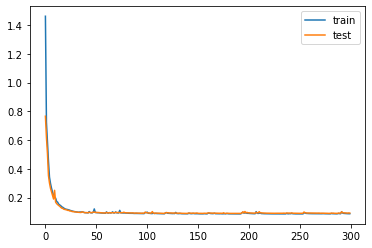

In [18]:
# number of input columns
n_inputs = X.shape[1]
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# scale data
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)

# define encoder
visible = Input(shape=(n_inputs,))

# encoder level 1
e = Dense(200)(visible)
e = ReLU()(e)
e = Dropout(0.05)(e)

# encoder level 1
e = Dense(100)(visible)
e = ReLU()(e)
e = Dropout(0.05)(e)

# encoder level 1
e = Dense(50)(visible)
e = ReLU()(e)
e = Dropout(0.05)(e)

# encoder level 1
e = Dense(30)(visible)
e = ReLU()(e)
e = Dropout(0.05)(e)

# bottleneck
n_bottleneck = round(float(n_inputs))
bottleneck = Dense(n_bottleneck)(e)

# define decoder, level 1
# encoder level 1
d = Dense(30)(bottleneck)
d = ReLU()(d)
d = Dropout(0.05)(d)

d = Dense(50)(bottleneck)
d = ReLU()(d)
d = Dropout(0.05)(d)

d = Dense(100)(bottleneck)
d = ReLU()(d)
d = Dropout(0.05)(d)

d = Dense(200)(bottleneck)
d = ReLU()(d)
d = Dropout(0.05)(d)

# output layer
output = Dense(n_inputs, activation='sigmoid')(d)

# define an encoder model (without the decoder)
encoder = Model(inputs=visible, outputs=bottleneck)

# Compile before plotting
encoder.compile(optimizer='adam', loss='binary_crossentropy')

plot_model(encoder, 'encoder_compress.png', show_shapes=True)

# fit the autoencoder model to reconstruct input
history = encoder.fit(X_train, X_train, epochs=300, batch_size=16, verbose=2, validation_data=(X_test,X_test))

# plot loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

# save the encoder to file
encoder.save('/Users/jun/Library/CloudStorage/OneDrive-개인/clinical db stomach/ML/encoder.h5')

## Comparision AE & LR

In [23]:
model = LogisticRegression(solver='lbfgs',max_iter=500)
# fit model on training set
model.fit(X_train, y_train)
# make prediction on test set
yhat = model.predict(X_test)
# calculate accuracy
acc = accuracy_score(y_test, yhat)
print(acc)

0.7796754910333049


In [24]:
# load the model from file
encoder = load_model('/Users/jun/Library/CloudStorage/OneDrive-개인/clinical db stomach/ML/encoder.h5')
# encode the train data
X_train_encode = encoder.predict(X_train)
# encode the test data
X_test_encode = encoder.predict(X_test)
# define the model
model = LogisticRegression()
# fit the model on the training set
model.fit(X_train_encode, y_train)
# make predictions on the test set
yhat = model.predict(X_test_encode)
# calculate classification accuracy
acc = accuracy_score(y_test, yhat)
print(acc)

2022-05-13 11:31:57.742567: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


0.7813834329632793


/Users/jun/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
